In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns 
from sklearn import svm
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.models import Sequential 
from sklearn.linear_model import LogisticRegression
from keras.layers import Dense
from keras import regularizers
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Using TensorFlow backend.


In [2]:
tdata = pd.read_csv("Integrated.csv",header=None,na_values=[-9])

new_data = tdata[[8,9,18,31,57]].copy()
#data = new_data.values

new_data.columns = ['Chest Pain','Blood Pressure','ECG','Pulse Rate','Target']

print(new_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 5 columns):
Chest Pain        899 non-null int64
Blood Pressure    840 non-null float64
ECG               897 non-null float64
Pulse Rate        844 non-null float64
Target            899 non-null int64
dtypes: float64(3), int64(2)
memory usage: 35.2 KB
None


     Chest Pain  Blood Pressure  ECG  Pulse Rate  Target
0             1       145.00000  2.0       150.0       0
1             4       160.00000  2.0       108.0       2
2             4       120.00000  2.0       129.0       1
3             3       130.00000  0.0       187.0       0
4             2       130.00000  2.0       172.0       0
5             2       120.00000  0.0       178.0       0
6             4       140.00000  2.0       160.0       3
7             4       120.00000  0.0       163.0       0
8             4       130.00000  2.0       147.0       2
9             4       140.00000  2.0       155.0       1
10            4       140.00000  0.0       148.0       0
11            2       140.00000  2.0       153.0       0
12            3       130.00000  2.0       142.0       2
13            2       120.00000  0.0       173.0       0
14            3       172.00000  0.0       162.0       0
15            3       150.00000  0.0       174.0       0
16            2       110.00000

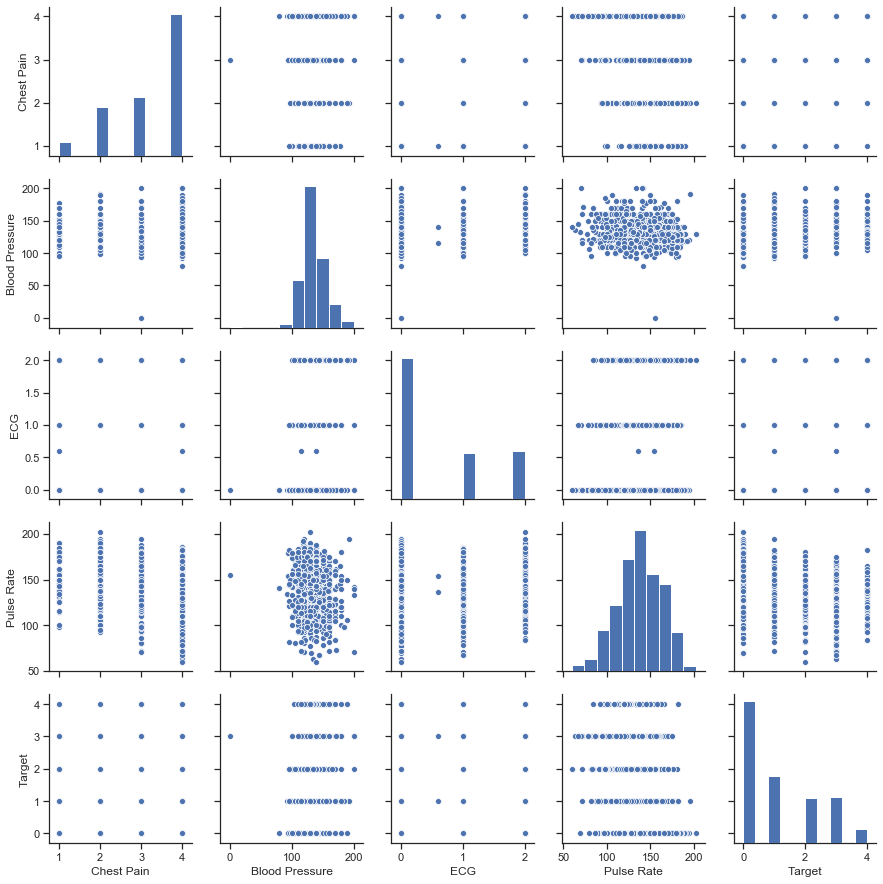

0    404
1    191
3    132
2    130
4     42
Name: Target, dtype: int64
[[  1. 145.   2. 150.   0.]
 [  4. 160.   2. 108.   0.]
 [  4. 120.   2. 129.   0.]
 ...
 [  3. 125.   0.  98.   0.]
 [  4. 130.   0. 110.   1.]
 [  4. 155.   0.  90.   0.]]
(899, 5)


<Figure size 432x288 with 0 Axes>

In [3]:
new_data['Blood Pressure'].fillna(new_data['Blood Pressure'].mean(),inplace=True)
new_data['ECG'].fillna(new_data['ECG'].mean(),inplace=True)
new_data['Pulse Rate'].fillna(new_data['Pulse Rate'].mean(),inplace=True)


print(new_data)
#print(new_data.info())
sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(new_data,palette="husl")
plt.show()
plt.savefig("Pair_Plot.jpg")

print(new_data['Target'].value_counts())

new_data.replace({'Target' : 0}, 0, inplace=True)
new_data.replace({'Target' : 1}, 0, inplace=True)
new_data.replace({'Target' : 2}, 0, inplace=True)
new_data.replace({'Target' : 3}, 1, inplace=True)
new_data.replace({'Target' : 4}, 1, inplace=True)

data = new_data.values
print(data)
print(data.shape)

In [4]:
#________ Target and Features Split ______

X = data[:,:-1]
print(X)
y = data[:,-1]
print(y)
y = y.reshape((y.shape[0],1))

#_____ Normalization _____

n_X = preprocessing.normalize(X)
n_y = preprocessing.normalize(y)
n_y = n_y.reshape((n_y.shape[0],))


[[  1. 145.   2. 150.]
 [  4. 160.   2. 108.]
 [  4. 120.   2. 129.]
 ...
 [  3. 125.   0.  98.]
 [  4. 130.   0. 110.]
 [  4. 155.   0.  90.]]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [5]:
#__________________  Train_Test_Split ___________________

training_X, testing_X, training_y, testing_y = train_test_split(n_X,n_y,test_size=0.10,random_state=70)

print('Training data: '+str(training_X.shape) +' '+ str(training_y.shape))
print('Testing  data: '+str(testing_X.shape) +' '+str(testing_y.shape))



Training data: (809, 4) (809,)
Testing  data: (90, 4) (90,)


In [6]:
#_________________ Decision Tree Algorithm _________________
#train_df, test_df = train_test_split(data, test_size = 0.10)
#separate features and targets for training set and test set
print('Decision Tree Model')
training_X, testing_X, training_y, testing_y = train_test_split(n_X,n_y,test_size=0.10,random_state=70)

from sklearn import tree
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=30)
clf.fit(training_X,training_y)
predicting_y = clf.predict(testing_X)
#accuracy of the prediction
score = accuracy_score(testing_y,predicting_y)
print(score)

Decision Tree Model
0.8666666666666667


In [7]:
#_______  Using Logistic Regression _______
training_X, testing_X, training_y, testing_y = train_test_split(n_X,n_y,test_size=0.10,random_state=70)
print('Logistic Regression')     
clf = LogisticRegression(random_state=0,solver='lbfgs',multi_class='multinomial')
clf.fit(training_X,training_y)
clf.predict(testing_X)
r = clf.score(testing_X,testing_y)
print(r)

Logistic Regression
0.8555555555555555


In [8]:
# _____ Using KNN _____
print('K Nearest Neighbors')
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(training_X,training_y)
y_prediction = knn.predict(testing_X)
score = metrics.accuracy_score(testing_y,y_prediction)
print(score)

training_y = np.expand_dims(training_y, axis=1)



K Nearest Neighbors
0.8111111111111111


In [9]:
#_______________ Using Neural Net ___________
print('Multi Layer Perceptron Deep Learning Model')
model = Sequential()
model.add(Dense(units=10,activation='relu',input_dim=4,kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=64,activation='relu',kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01)))
model.add(Dense(units=8,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='Adadelta',metrics=['accuracy'])
model.fit(training_X,training_y,epochs=50)

loss_and_metrics = model.evaluate(testing_X,testing_y)



Multi Layer Perceptron Deep Learning Model
Epoch 1/50
809/809 [==============================] - 0s 358us/step - loss: 3.6185 - accuracy: 0.4611
Epoch 2/50
809/809 [==============================] - 0s 33us/step - loss: 2.8536 - accuracy: 0.8010
Epoch 3/50
809/809 [==============================] - 0s 35us/step - loss: 2.5393 - accuracy: 0.8010
Epoch 4/50
809/809 [==============================] - 0s 36us/step - loss: 2.3264 - accuracy: 0.8010
Epoch 5/50
809/809 [==============================] - 0s 35us/step - loss: 2.1597 - accuracy: 0.8010
Epoch 6/50
809/809 [==============================] - 0s 33us/step - loss: 2.0139 - accuracy: 0.8010
Epoch 7/50
809/809 [==============================] - 0s 32us/step - loss: 1.8857 - accuracy: 0.8010
Epoch 8/50
809/809 [==============================] - 0s 32us/step - loss: 1.7788 - accuracy: 0.8010
Epoch 9/50
809/809 [==============================] - 0s 33us/step - loss: 1.6929 - accuracy: 0.8010
Epoch 10/50
809/809 [==========================